In [484]:
import torch
from torch import nn

In [485]:
weight=0.7
bias=0.3

In [486]:
X=torch.arange(0,1,0.02).unsqueeze(1)
y=weight*X+bias

In [487]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [488]:
len(X),len(y)

(50, 50)

In [489]:
#slitting dataset into training and testing part
split=int(0.8*len(X))

X_train,X_test=X[:split],X[split:]

y_train,y_test=y[:split],y[split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [490]:
#making plots
import matplotlib.pyplot as plt

def plot_predictions(
    train_data=X_train,
    train_label=y_train,
    test_data=X_test,
    test_label=y_test,
    predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c='b',s=4,label="training data")

  plt.scatter(test_data,test_label,c='g',s=4,label="test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label="predictions")


  plt.legend(prop={"size": 14});




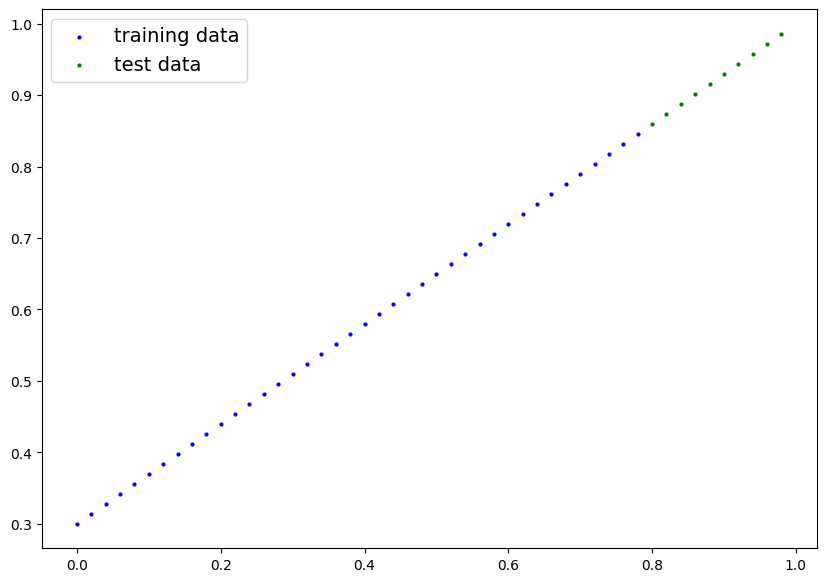

In [491]:
plot_predictions()

In [492]:
#creating a model
class lin_reg_model(nn.Module):
  def __init__(self):
    super().__init__()

    self.w=nn.Parameter(torch.randn(1,dtype=torch.float),
                        requires_grad=True)


    self.b=nn.Parameter(torch.randn(1,dtype=torch.float32),
        requires_grad=True)


  def forward(self,x):
    return self.w*x+self.b

In [493]:
torch.manual_seed(42)
#initializing the model
model_0=lin_reg_model()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [494]:
model_0.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

In [495]:
#evaluating the model
with torch.inference_mode():
  y_pred=model_0(X_test)


In [496]:
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

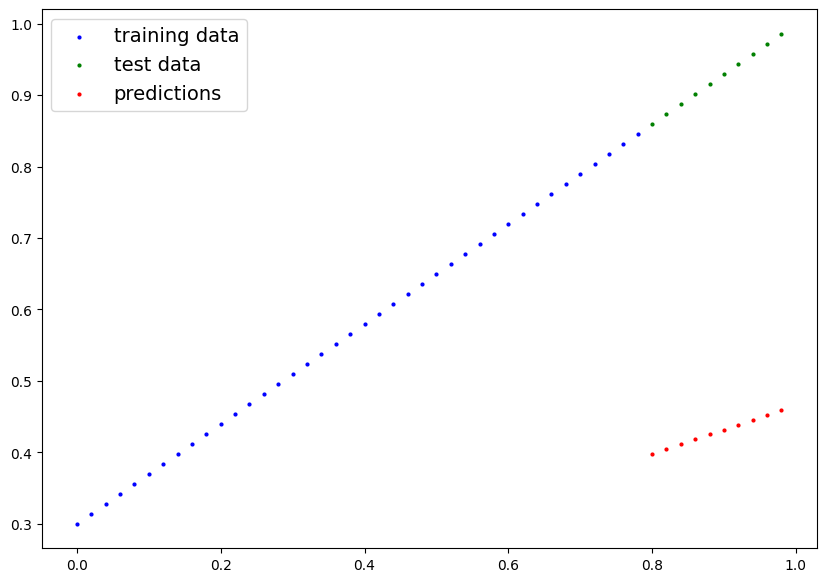

In [497]:
plot_predictions(predictions=y_pred)

In [498]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [499]:
#creating the training and testing loop
torch.manual_seed(42)

epochs=1000

epoch_count=[]
train_losses=[]
test_losses=[]

for epoch in range(epochs):
  #training:
  model_0.train()

  #forward pass
  y_pred=model_0(X_train)

  #calculate the loss
  loss=loss_fn(y_pred,y_train)

  #optimizer
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing loop

  model_0.eval()

  with torch.inference_mode():
    test_pred=model_0(X_test)

    test_loss=loss_fn(test_pred,y_test)

    if epoch%10==0:
      epoch_count.append(epoch)
      train_losses.append(loss.detach().numpy())
      test_losses.append(test_loss.detach().numpy())
      print(f'epoch={epoch}  | train_loss={loss}  |  test_loss={test_loss} ')





epoch=0  | train_loss=0.31288138031959534  |  test_loss=0.48106518387794495 
epoch=10  | train_loss=0.1976713240146637  |  test_loss=0.3463551998138428 
epoch=20  | train_loss=0.08908725529909134  |  test_loss=0.21729660034179688 
epoch=30  | train_loss=0.053148526698350906  |  test_loss=0.14464017748832703 
epoch=40  | train_loss=0.04543796554207802  |  test_loss=0.11360953003168106 
epoch=50  | train_loss=0.04167863354086876  |  test_loss=0.09919948130846024 
epoch=60  | train_loss=0.03818932920694351  |  test_loss=0.08886633068323135 
epoch=70  | train_loss=0.03476089984178543  |  test_loss=0.0805937647819519 
epoch=80  | train_loss=0.03132382780313492  |  test_loss=0.07232122868299484 
epoch=90  | train_loss=0.02788739837706089  |  test_loss=0.06473556160926819 
epoch=100  | train_loss=0.024458957836031914  |  test_loss=0.05646304413676262 
epoch=110  | train_loss=0.021020207554101944  |  test_loss=0.04819049686193466 
epoch=120  | train_loss=0.01758546568453312  |  test_loss=0.040

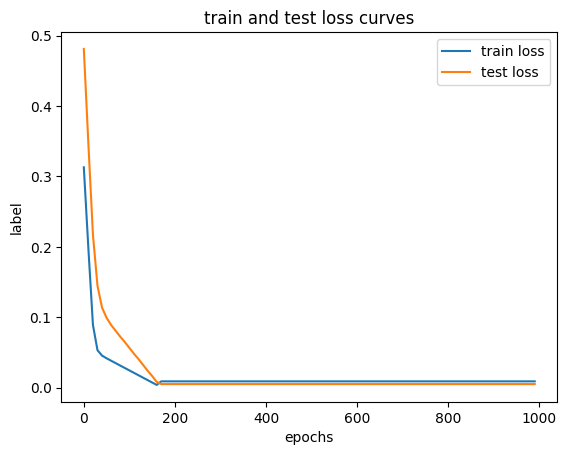

In [500]:
plt.plot(epoch_count, train_losses, label="train loss")
plt.plot(epoch_count, test_losses, label="test loss")
plt.title("train and test loss curves")
plt.xlabel("epochs")
plt.ylabel("label")

plt.legend()

In [501]:
#evaluating the model
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

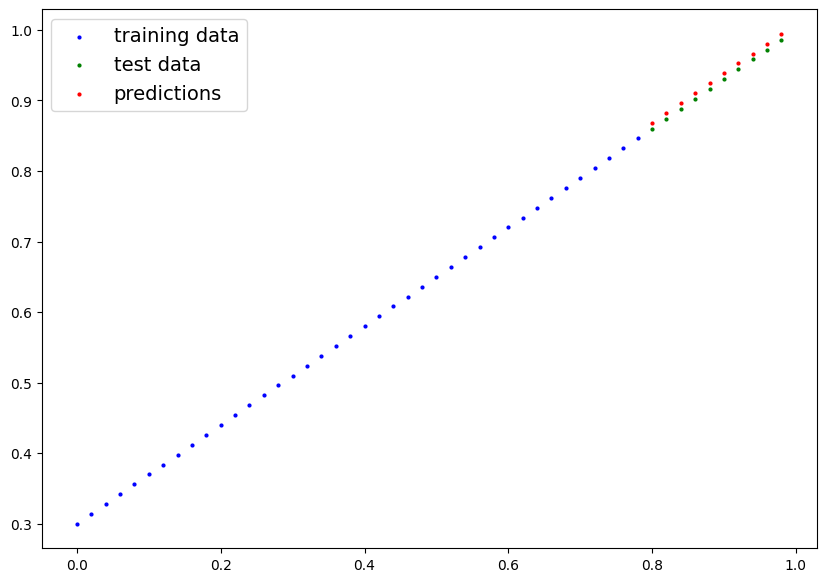

In [502]:
plot_predictions(predictions=y_preds)

In [503]:
model_0.state_dict()

OrderedDict([('w', tensor([0.6990])), ('b', tensor([0.3093]))])

In [506]:
#saving the model
from pathlib import Path
model_file_name=Path('saved_model')
model_file_name.mkdir(parents=True, exist_ok=True)

#making a save path
model_name="first_model.pth"
model_save_path=model_file_name/model_name

#saving the actual model
print(f'saving the model to {model_save_path}')
torch.save(obj=model_0.state_dict(),f=model_save_path)

saving the model to saved_model/first_model.pth


In [511]:
#loading the model
loaded_model=lin_reg_model()
loaded_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [512]:
loaded_model.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [513]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])